In [25]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import extractMongoDB

In [26]:
df = pd.read_csv("17-04_to_02-05.csv")
df.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,address_district,address_ward,address_street,price(billionVND)
0,22539926,225.0,45.0,3.0,5.0,Sổ hồng,10.839189,106.661079,850.0,5.00,9.0,1.0,12.0,12.0,2.0,3.0,3.0,0.0,1.0,17.0,5.0,Quận Gò Vấp,Phường 11,Thống Nhất,6.50
1,22524911,126.0,33.0,5.0,6.0,Sổ hồng,10.807009,106.691612,850.0,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,Quận Bình Thạnh,Phường 7,Lê Quang Định,5.10
2,22521691,109.0,63.0,4.0,4.0,Sổ hồng,10.812072,106.687519,850.0,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,Quận Bình Thạnh,Phường 5,Lê Quang Định,6.95
3,22538386,78.0,39.0,2.0,2.0,Sổ hồng,10.805522,106.705147,850.0,2.80,13.0,1.0,7.0,10.0,4.0,11.0,4.0,0.0,1.0,1.0,7.0,Quận Bình Thạnh,Phường 24,Bùi Đình Túy,4.78
4,22448804,300.0,60.0,3.0,4.0,Sổ hồng,10.845728,106.644039,850.0,4.00,15.0,0.0,12.0,6.0,2.0,3.0,0.0,0.0,2.0,8.0,1.0,Quận Gò Vấp,Phường 14,Đường 44,7.20


## Khám phá dữ liệu

In [27]:
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

In [28]:
df['price(billionVND)'].describe()

count    1.788200e+04
mean     2.710995e+01
std      1.295326e+02
min      1.150000e-07
25%      5.057500e+00
50%      8.690000e+00
75%      2.150000e+01
max      7.600000e+03
Name: price(billionVND), dtype: float64

Nhận thấy rằng giá trị max không hợp lý

In [29]:
df.columns

Index(['id', 'area_used', 'area', 'bedroom', 'wc', 'juridical', 'latitude',
       'longitude', 'seniority', 'witdh', 'length', 'no_hospital_1km',
       'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km', 'no_atm_1km',
       'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km', 'address_district', 'address_ward',
       'address_street', 'price(billionVND)'],
      dtype='object')

Xử lý giá nhà
- Đối với những nhà > 1000 tỷ thì diện tích > 500m2

In [30]:
df[df['price(billionVND)'] > 1000]

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,address_district,address_ward,address_street,price(billionVND)
19,22120776,7.0,7.0,1.0,1.0,Sổ hồng,10.791380,106.688983,2400.0,37.5,56.0,5.0,20.0,73.0,92.0,27.0,38.0,0.0,4.0,8.0,4.0,Quận 1,Phường Tân Định,Võ Thị Sáu,1350.0
625,22453191,4.0,4.0,15.0,15.0,Sổ hồng,10.787884,106.698403,2400.0,19.0,26.0,4.0,24.0,96.0,134.0,36.0,38.0,0.0,2.0,6.0,6.0,Quận 1,Phường Đa Kao,Nguyễn Đình Chiểu,1050.0
1615,22442886,3050.0,3050.0,3.0,3.0,Sổ hồng,10.780748,106.691662,2400.0,35.0,90.0,8.0,27.0,123.0,179.0,54.0,45.0,0.0,1.0,3.0,7.0,Quận 3,Phường 6 (Phường Võ Thị Sáu),Pasteur,2120.0
2238,22505118,72.0,72.0,3.0,2.0,Không xác định,10.847901,106.781555,116.0,4.0,16.0,3.0,10.0,3.0,7.0,8.0,8.0,0.0,1.0,2.0,4.0,Quận 9 (TP. Thủ Đức),Phường Hiệp Phú,Trương Văn Thành,4190.0
3923,22437840,32.0,32.0,5.0,5.0,Sổ hồng,10.781120,106.704693,330.0,33.0,39.0,2.0,9.0,163.0,217.0,38.0,44.0,0.0,1.0,4.0,4.0,Quận 1,Phường Bến Nghé,Mạc Đĩnh Chi,1200.0
5643,22480372,258.0,68.0,4.0,5.0,Sổ hồng,10.806956,106.605865,725.0,4.0,17.0,0.0,4.0,3.0,2.0,4.0,2.0,0.0,0.0,0.0,3.0,Quận Bình Tân,Phường Bình Hưng Hòa,Đường số 15,6290.0
6387,22537874,90.0,49.0,2.0,1.0,Sổ hồng,10.833191,106.712540,2310.0,4.0,10.0,0.0,3.0,15.0,2.0,1.0,2.0,0.0,1.0,6.0,7.0,Quận Thủ Đức (TP. Thủ Đức),Phường Hiệp Bình Chánh,Đường số 7,3650.0
6531,22304286,90.0,45.0,4.0,3.0,Sổ hồng,10.773942,106.682941,515.0,5.0,13.0,8.0,18.0,73.0,111.0,24.0,33.0,0.0,5.0,4.0,7.0,Quận 3,Phường 4,Nguyễn Đình Chiểu,6500.0
6702,22340776,120.0,40.0,3.0,3.0,Sổ hồng,10.793183,106.674568,515.0,4.0,10.0,5.0,26.0,61.0,42.0,18.0,37.0,0.0,3.0,10.0,6.0,Quận Phú Nhuận,Phường 11,Nguyễn Đình Chính,7600.0
10891,22538180,508.0,508.0,15.0,15.0,Sổ đỏ,10.787884,106.698403,16.0,19.0,27.0,4.0,24.0,96.0,134.0,36.0,38.0,0.0,2.0,0.0,6.0,Quận 1,Phường Đa Kao,Nguyễn Đình Chiểu,1100.0


In [31]:
index_outlier = df[(df['price(billionVND)'] > 1000) & ((df['area'] < 400) | (df['area_used'] < 400))].index
index_outlier

Index([19, 625, 2238, 3923, 5643, 6387, 6531, 6702, 11327, 13097, 13142,
       17701],
      dtype='int64')

In [32]:
df.drop(index_outlier, inplace=True)

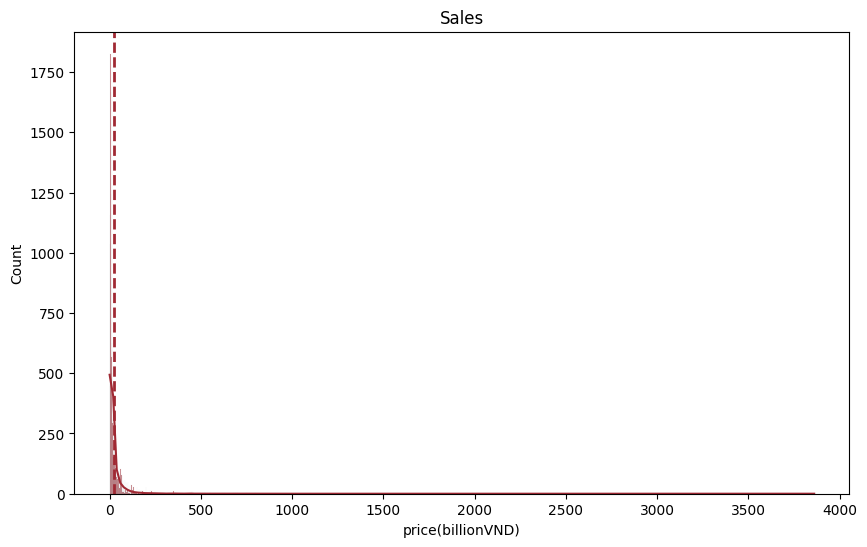

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price(billionVND)'], color=colors[7], kde=True)
plt.axvline(x=df['price(billionVND)'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Sales');

### Câu hỏi

#### Mối quan hệ tương quan giữa giá nhà với ‘area’, ‘bedroom’, ‘wc’, ‘juridical’, ‘seniority’, ‘no_hospital_1km’, ‘no_school_1km’, ‘no_cafe_1km’, ‘no_restaurant_1km’, ‘no_atm_1km’, ‘no_bank_1km’, ‘no_supermarket_1km’, ‘no_marketplace_1km’, ‘no_pharmacy_1km’, ‘no_fuel_1km

In [34]:
df.columns

Index(['id', 'area_used', 'area', 'bedroom', 'wc', 'juridical', 'latitude',
       'longitude', 'seniority', 'witdh', 'length', 'no_hospital_1km',
       'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km', 'no_atm_1km',
       'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km', 'address_district', 'address_ward',
       'address_street', 'price(billionVND)'],
      dtype='object')

##### Mối quan hệ tương quan giữa giá nhà và các thông số của ngôi nhà

Xử lý `juridical`

In [35]:
df['juridical'].unique()

array(['Sổ hồng', 'Sổ đỏ', 'Hợp đồng mua bán', 'Không xác định',
       'Giấy tờ hợp lệ', 'Giấy tờ viết tay'], dtype=object)

Pháp lý `Không xác định` -> 0, còn lại sẽ trả về 1

In [36]:
df.loc[df['juridical'] != 'Không xác định', 'juridical'] = 1
df.loc[df['juridical'] == 'Không xác định', 'juridical'] = 0

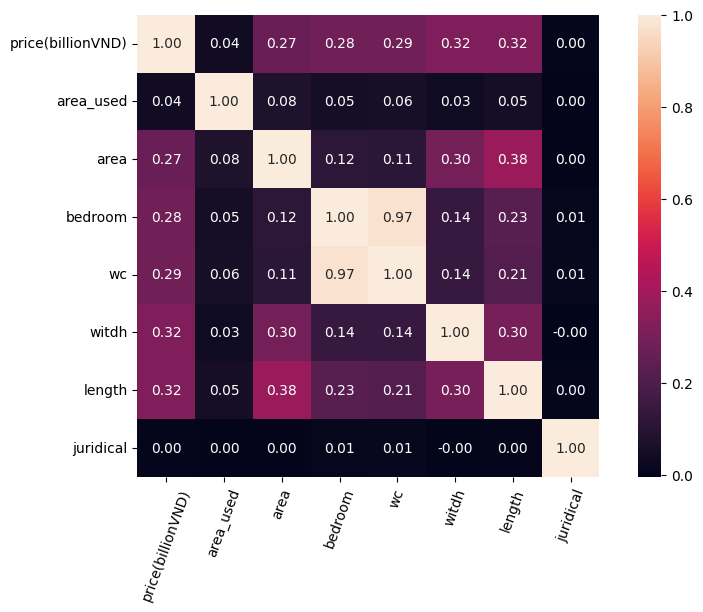

In [37]:
df_params = df[['price(billionVND)','area_used', 'area', 'bedroom', 'wc', 'witdh','length','juridical']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_params.corr(), annot=True, fmt=".2f", square=True)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
- `bedroom` và `wc` có mối tương quan rất mạnh (0.97) -> số lượng phòng ngủ và wc thường đi đôi với nhau trong 1 ngôi nhà
- `price(billionVND)` và các biến khác: Giá nhà `price(billionVND)` có mối tương quan thấp với `area_used` (0.04) nhưng lại có mối tương quan khá mạnh với `area` cũng như là `width` và `length`. `bedroom` và `wc` cũng có mối tương quan mạnh với `price(billionVND)`. Điều đó cho thấy giá nhà phụ thuộc vào diện tích tổng thể cũng như là số phòng ngủ và wc hơn là diện tích sử dụng
- `juridical` có mối tương quan rất thấp với tất cả các biến khác, cho thấy tình hình pháp lý có thể không ảnh hưởng nhiều đến giá nhà hoặc các thông số khác của ngôi nhà.

##### Mối quan hệ tương quan giữa giá nhà và các tiện ích xung quanh

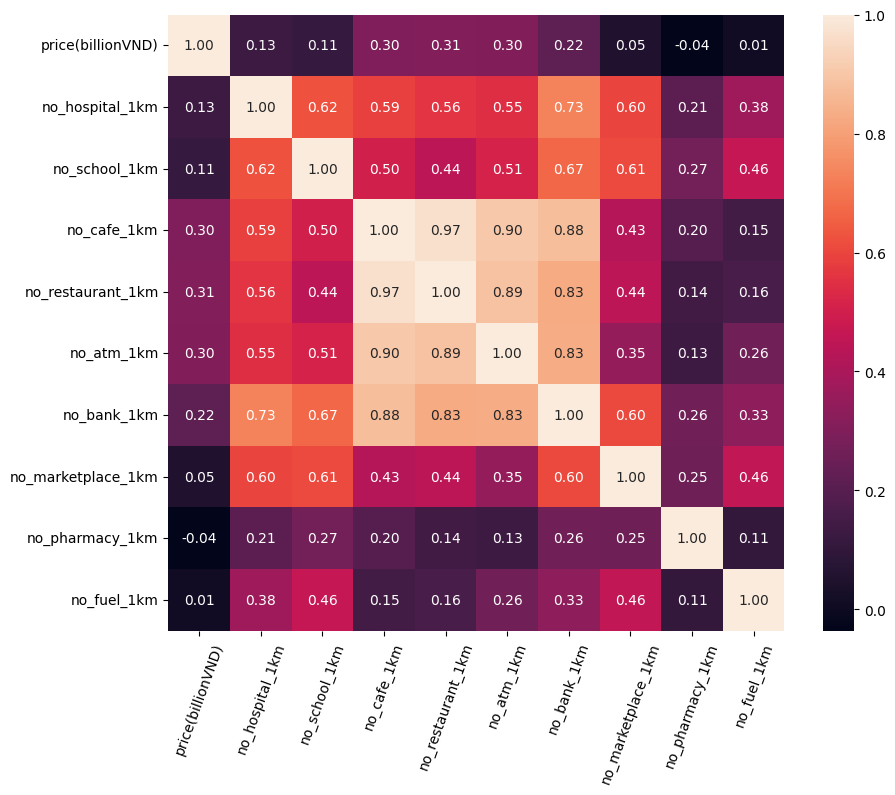

In [38]:
df_around = df[['price(billionVND)','no_hospital_1km',
       'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km', 'no_atm_1km',
       'no_bank_1km', 'no_marketplace_1km',
       'no_pharmacy_1km', 'no_fuel_1km']]

plt.figure(figsize=(10, 8))
sns.heatmap(df_around.corr(), annot=True, fmt=".2f", square=True)
plt.xticks(rotation=70)
plt.show()

Nhận xét:
- Có một mối tương quan tích cực giữa giá nhà và số lượng các tiện ích: cà phê (0.3), nhà hàng (0.31), atm(0.3), ngân hàng (0.22). Điều này cho thấy giá nhà gần các tiện ích này thường có giá cao hơn nhà gần các tiện ích khác
- Bệnh viện, trường học và giá nhà: Mối tương quan giữa giá nhà và số lượng bệnh viện (‘no_hospital_1km’: 0.126) hoặc trường học (‘no_school_1km’: 0.114) trong bán kính 1km là tương đối thấp. Điều này có thể cho thấy rằng những tiện ích này không ảnh hưởng nhiều đến giá nhà như các tiện ích khác
- Chợ, hiệu thuốc, trạm xăng và giá nhà: Mối tương quan giữa giá nhà và số lượng chợ (‘no_marketplace_1km’: 0.048), hiệu thuốc (‘no_pharmacy_1km’: -0.040), hoặc trạm xăng (‘no_fuel_1km’: 0.012) trong bán kính 1km rất thấp hoặc gần như không có. Điều này có thể cho thấy rằng những tiện ích này không ảnh hưởng đến giá nhà.
- Giữa các tiện ích với nhau:
    - Có một số mối tương quan mạnh giữa các tiện ích xung quanh, chẳng hạn như ‘no_cafe_1km’ và ‘no_restaurant_1km’ (0.970), ‘no_cafe_1km’ và ‘no_atm_1km’ (0.905), ‘no_restaurant_1km’ và ‘no_atm_1km’ (0.890). Điều này có thể cho thấy rằng các tiện ích thường được đặt gần nhau.

Kết luận: **Vì hệ số tương quan giữa giá nhà và các tiện ích rất thấp (cao nhất là 0.31) nên ngoài số lượng tiện ích còn có những yếu tố khác nữa đang ảnh hưởng đến giá nhà**

In [39]:
df_around.columns[1:]

Index(['no_hospital_1km', 'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km',
       'no_atm_1km', 'no_bank_1km', 'no_marketplace_1km', 'no_pharmacy_1km',
       'no_fuel_1km'],
      dtype='object')

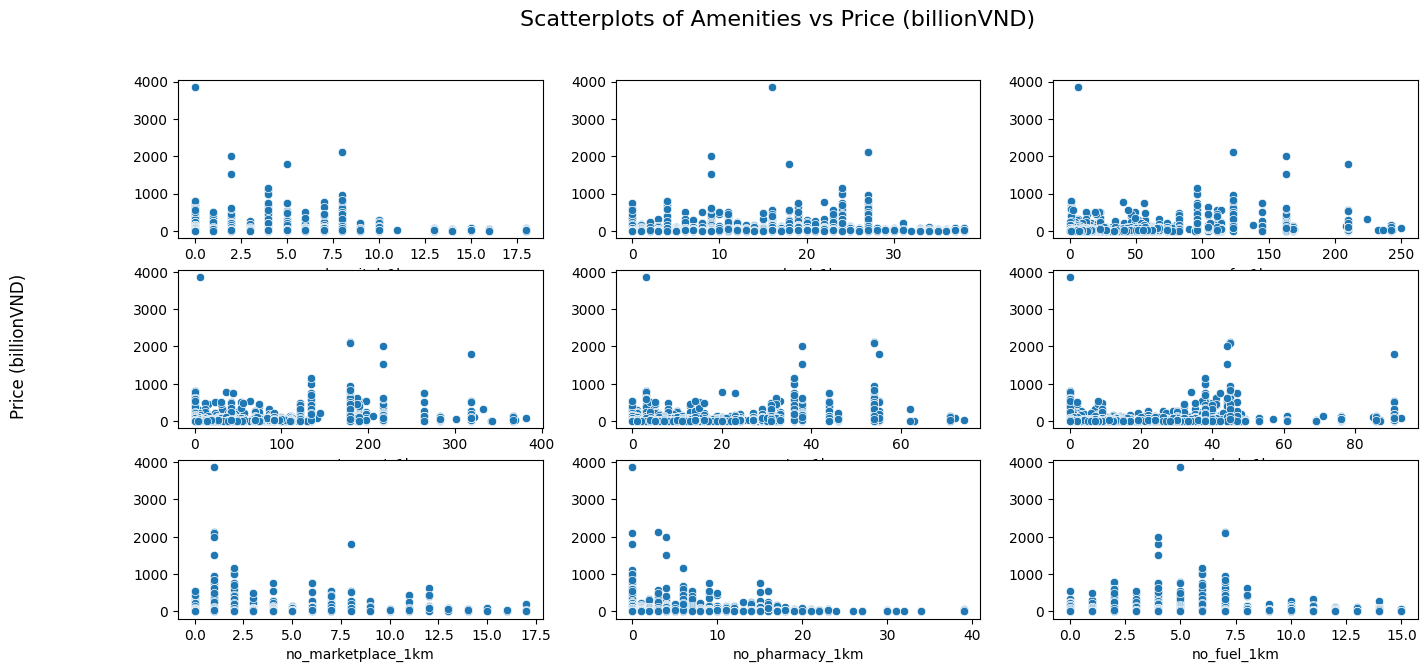

In [40]:
f, ax = plt.subplots(3,3,figsize =(16, 7))
index = 0
for row in range(3):
    for col in range(3):
        sns.scatterplot(x=df_around.columns[1:][index], y='price(billionVND)', data=df, ax=ax[row][col])
        ax[row][col].set_ylabel('')
        index += 1
f.suptitle('Scatterplots of Amenities vs Price (billionVND)', fontsize=16)
f.supylabel('Price (billionVND)')
plt.show()

Nhận xét:
- Tiện ích và giá nhà: Dựa trên biểu đồ, không có mối tương quan mạnh mẽ rõ ràng giữa giá nhà và số lượng các tiện ích như bệnh viện, trường học, cà phê, nhà hàng, ATM, ngân hàng, siêu thị, chợ, hiệu thuốc, và trạm xăng trong bán kính 1km. Điều này có thể cho thấy rằng mặc dù các tiện ích này quan trọng, nhưng chúng có thể không phải là yếu tố duy nhất ảnh hưởng đến giá nhà.
- Phân tán dữ liệu: Dữ liệu trong biểu đồ phân tán rất rộng, cho thấy có sự biến động lớn trong giá nhà cũng như số lượng các tiện ích xung quanh. Điều này có thể phản ánh sự đa dạng của các ngôi nhà và khu vực xung quanh chúng.
- Không có xu hướng rõ ràng: Không có xu hướng tăng hoặc giảm rõ ràng giữa giá nhà và số lượng các tiện ích, cho thấy có thể có các yếu tố khác ngoài số lượng tiện ích ảnh hưởng đến giá nhà.

#### Giá nhà giữa các khu vực

##### Giá nhà trên mét vuông = giá tiền / diện tích sử dụng

In [41]:
df['area'].describe()

count    17870.000000
mean       120.034079
std        362.287836
min          1.000000
25%         52.000000
50%         74.000000
75%        120.000000
max      34444.000000
Name: area, dtype: float64

In [42]:
df.drop(df[df['area'] < 10].index, inplace=True)

In [43]:
df['price(billionVND)'].describe()

count    16681.000000
mean        25.248582
std         70.612239
min          0.003500
25%          5.468000
50%          8.990000
75%         22.000000
max       3860.000000
Name: price(billionVND), dtype: float64

In [44]:
df['price_per_square_meters(mil/m2)'] = df['price(billionVND)']/df['area']*1000

In [ ]:
mean_district_prices = df.groupby('address_district')['price_per_square_meters(mil/m2)'].mean().sort_values(ascending=True)
mean_district_prices

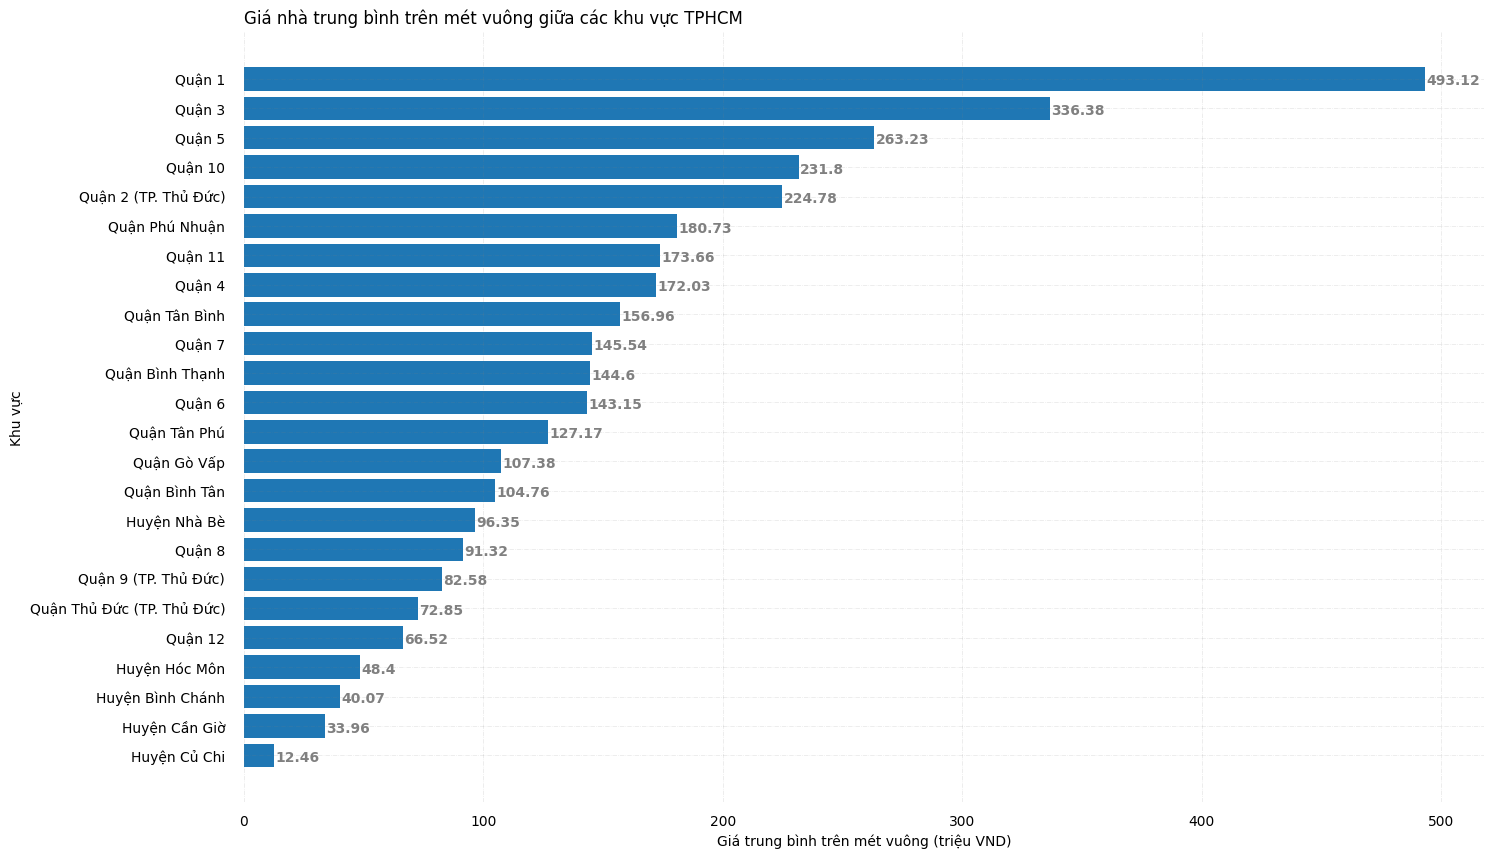

In [46]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(mean_district_prices.index, mean_district_prices)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
# Show top values 
# ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Giá nhà trung bình trên mét vuông giữa các khu vực TPHCM', loc ='left')
ax.set_xlabel('Giá trung bình trên mét vuông (triệu VND)')
ax.set_ylabel('Khu vực')
# Show Plot
plt.show()

Nhận xét:
- Sự chênh lệch giá đất giữa các khu vực trung tâm và ngoại thành là rất lớn. Trong khi các quận 1, 3, 5 có giá trên 260 triệu đồng/m2 thì các huyện Hóc Môn, Bình Chánh, Cần Giờ, Củ Chi chỉ dưới 50 triệu đồng/m2.
- Quận 1 có mức giá đất cao nhất thành phố, đạt gần 500 triệu đồng/m2, gấp hơn 40 lần so với quận có mức giá thấp nhất là Huyện Củ Chi (chỉ 12,46 triệu đồng/m2).
- Quận 3 cũng nằm trong nhóm có giá đất cao nhất TP.HCM với ~330 triệu đồng/m2. Quận 5 đứng thứ 3 với hơn 260 triệu đồng/m2.
- Đối với TP Thủ Đức, giá nhà ở quận 2 cao hơn nhiều so với 2 quận còn lại. Lý do là vị trí địa lý quận 2 gần trung tâm thành phố, có nhiều tiện ích và dịch vụ từ nhà hàng sang trọng đến các trung tâm mua sắm. Quận 2 có nhiều dự án bất động sản cao cấp thu hút nhiều nhà đầu tư trong và ngoài nước. Ngoài ra quận 2 có vị trí thuận lợi với nhiều tuyến đường huyết mạch và dự án giao thông trọng điểm như tuyến Metro Bến Thành - Suối Tiên.
    - Thành phố Thủ Đức: Thành phố Hồ Chí Minh đã hợp nhất 3 quận (Quận 2, Quận 9 và Quận Thủ Đức) để tạo thành Thành phố Thủ Đức. Thành phố này được phát triển theo hướng thành phố công nghệ sáng tạo, thu hút các tập đoàn công nghệ đa quốc gia mở rộng sản xuất. Do đó, nhu cầu về căn hộ và nhà ở đối với người nước ngoài và chuyên gia sẽ không ngừng tăng ở Quận 2.
- Các quận trung tâm khác như quận 10, Tân Bình, Bình Thạnh vẫn đạt mức giá cao từ 140-230 triệu đồng/m2.
- Trong số các huyện, huyện Nhà Bè (96 triệu đồng/m2) có giá nhà cao hơn nhiều so với các huyện khác

Nhìn chung, biểu đồ phản ánh rõ nét sự phân hóa giá nhà đất theo vùng địa lý tại TP.HCM, với sự chênh lệch rất lớn giữa trung tâm và ngoại thành, phù hợp với mô hình phát triển kinh tế - xã hội không cân đối giữa các khu vực của thành phố.

##### Tại sao lại có sự chênh lệch giá nhà giữa các quận
- Vị trí địa lý: Các quận trung tâm như Quận 1, Quận 3 thường có giá nhà cao hơn do vị trí thuận lợi, gần các khu vực kinh doanh, thương mại và dịch vụ hấp dẫn.
- Hạ tầng và tiện ích: Các quận phát triển hơn với hệ thống giao thông, hạ tầng xã hội tốt hơn sẽ có giá nhà cao hơn các quận vùng ven.
- Cung cầu nhà đất: Tại các quận trung tâm, nguồn cung nhà đất hạn chế trong khi nhu cầu cao sẽ đẩy giá nhà lên cao.
- Môi trường sống: Các quận có môi trường sống đô thị, an ninh tốt hơn thường được ưa chuộng hơn, từ đó làm tăng giá nhà.

In [47]:
df.head()

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,address_district,address_ward,address_street,price(billionVND),price_per_square_meters(mil/m2)
0,22539926,225.0,45.0,3.0,5.0,1,10.839189,106.661079,850.0,5.00,9.0,1.0,12.0,12.0,2.0,3.0,3.0,0.0,1.0,17.0,5.0,Quận Gò Vấp,Phường 11,Thống Nhất,6.50,144.444444
1,22524911,126.0,33.0,5.0,6.0,1,10.807009,106.691612,850.0,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,Quận Bình Thạnh,Phường 7,Lê Quang Định,5.10,154.545455
2,22521691,109.0,63.0,4.0,4.0,1,10.812072,106.687519,850.0,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,Quận Bình Thạnh,Phường 5,Lê Quang Định,6.95,110.317460
3,22538386,78.0,39.0,2.0,2.0,1,10.805522,106.705147,850.0,2.80,13.0,1.0,7.0,10.0,4.0,11.0,4.0,0.0,1.0,1.0,7.0,Quận Bình Thạnh,Phường 24,Bùi Đình Túy,4.78,122.564103
4,22448804,300.0,60.0,3.0,4.0,1,10.845728,106.644039,850.0,4.00,15.0,0.0,12.0,6.0,2.0,3.0,0.0,0.0,2.0,8.0,1.0,Quận Gò Vấp,Phường 14,Đường 44,7.20,120.000000


In [48]:
# Thống kê số lượng tiện ích xung quanh giữa các quận
df_sum_around = df.groupby('address_district', as_index=False)[['no_hospital_1km', 'no_school_1km', 'no_cafe_1km', 'no_restaurant_1km',
                                                                'no_atm_1km', 'no_bank_1km', 'no_supermarket_1km', 'no_marketplace_1km', 'no_pharmacy_1km', 'no_fuel_1km']].median()
df_sum_around

,address_district,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km
0,Huyện Bình Chánh,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,Huyện Cần Giờ,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Huyện Củ Chi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,Huyện Hóc Môn,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,Huyện Nhà Bè,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Quận 1,4.0,19.0,96.0,134.0,32.0,38.0,0.0,2.0,0.0,4.0
6,Quận 10,8.0,23.0,51.0,70.0,9.0,29.0,0.0,6.0,10.0,5.0
7,Quận 11,1.0,26.0,2.0,10.0,7.0,27.0,0.0,5.0,0.0,10.0
8,Quận 12,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
9,Quận 2 (TP. Thủ Đức),0.0,7.0,5.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0


Mật độ các tiện ích trên diện tích khu vực

In [49]:
# import diện tích khu vực
df_acreage = pd.read_excel("./acreage_district2023.xlsx")
df_acreage['Diện tích (km²)'] = df_acreage['Diện tích (km²)'].astype(float)
df_acreage['Số Phường/Xã'] = df_acreage['Số Phường/Xã'].astype(int)
df_acreage.sort_values(by='Diện tích (km²)', inplace=True, ascending=False)
df_acreage

,Quận,Dân số (người),Diện tích (km²),Mật độ dân số (người/km²),Số Phường/Xã
22,Huyện Cần Giờ,74960,704.00,106,7
21,Huyện Củ Chi,403038,435.00,926,21
23,Huyện Bình Chánh,680000,253.00,2688,16
8,Quận 9 (TP. Thủ Đức),397000,114.00,3482,13
20,Huyện Hóc Môn,422471,109.00,3875,12
19,Huyện Nhà Bè,175360,100.00,1753,7
11,Quận 12,520175,52.78,9855,11
18,Quận Bình Tân,702650,51.89,13541,10
1,Quận 2 (TP. Thủ Đức),168680,49.74,3391,11
13,Quận Thủ Đức (TP. Thủ Đức),524670,48.00,1093,12


In [50]:
df_sum_around = df_sum_around.merge(df_acreage, left_on='address_district', right_on='Quận')
df_sum_around.drop(columns=['Quận'], inplace=True)
df_sum_around

,address_district,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,Dân số (người),Diện tích (km²),Mật độ dân số (người/km²),Số Phường/Xã
0,Huyện Bình Chánh,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,680000,253.00,2688,16
1,Huyện Cần Giờ,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74960,704.00,106,7
2,Huyện Củ Chi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,403038,435.00,926,21
3,Huyện Hóc Môn,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,422471,109.00,3875,12
4,Huyện Nhà Bè,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,175360,100.00,1753,7
5,Quận 1,4.0,19.0,96.0,134.0,32.0,38.0,0.0,2.0,0.0,4.0,205180,7.73,26543,10
6,Quận 10,8.0,23.0,51.0,70.0,9.0,29.0,0.0,6.0,10.0,5.0,372450,5.72,65113,15
7,Quận 11,1.0,26.0,2.0,10.0,7.0,27.0,0.0,5.0,0.0,10.0,332536,5.14,64695,16
8,Quận 12,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,520175,52.78,9855,11
9,Quận 2 (TP. Thủ Đức),0.0,7.0,5.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,168680,49.74,3391,11


In [51]:
df

,id,area_used,area,bedroom,wc,juridical,latitude,longitude,seniority,witdh,length,no_hospital_1km,no_school_1km,no_cafe_1km,no_restaurant_1km,no_atm_1km,no_bank_1km,no_supermarket_1km,no_marketplace_1km,no_pharmacy_1km,no_fuel_1km,address_district,address_ward,address_street,price(billionVND),price_per_square_meters(mil/m2)
0,22539926,225.0,45.0,3.0,5.0,1,10.839189,106.661079,850.0,5.00,9.0,1.0,12.0,12.0,2.0,3.0,3.0,0.0,1.0,17.0,5.0,Quận Gò Vấp,Phường 11,Thống Nhất,6.50,144.444444
1,22524911,126.0,33.0,5.0,6.0,1,10.807009,106.691612,850.0,3.20,9.5,5.0,13.0,15.0,9.0,11.0,12.0,0.0,4.0,4.0,11.0,Quận Bình Thạnh,Phường 7,Lê Quang Định,5.10,154.545455
2,22521691,109.0,63.0,4.0,4.0,1,10.812072,106.687519,850.0,4.05,12.0,2.0,17.0,9.0,7.0,8.0,3.0,0.0,2.0,1.0,8.0,Quận Bình Thạnh,Phường 5,Lê Quang Định,6.95,110.317460
3,22538386,78.0,39.0,2.0,2.0,1,10.805522,106.705147,850.0,2.80,13.0,1.0,7.0,10.0,4.0,11.0,4.0,0.0,1.0,1.0,7.0,Quận Bình Thạnh,Phường 24,Bùi Đình Túy,4.78,122.564103
4,22448804,300.0,60.0,3.0,4.0,1,10.845728,106.644039,850.0,4.00,15.0,0.0,12.0,6.0,2.0,3.0,0.0,0.0,2.0,8.0,1.0,Quận Gò Vấp,Phường 14,Đường 44,7.20,120.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17877,22548123,435.0,200.0,7.0,7.0,1,10.809148,106.735321,1490.0,7.00,30.0,1.0,11.0,23.0,42.0,4.0,0.0,0.0,1.0,3.0,2.0,Quận 2 (TP. Thủ Đức),Phường Thảo Điền,Quốc Hương,38.00,190.000000
17878,22548154,81.0,81.0,3.0,1.0,1,10.850631,106.719592,2340.0,3.50,27.0,0.0,4.0,2.0,2.0,1.0,2.0,0.0,0.0,3.0,4.0,Quận Thủ Đức (TP. Thủ Đức),Phường Hiệp Bình Phước,Quốc Lộ 13,3.95,48.765432
17879,22548153,51.0,51.0,3.0,3.0,1,10.832049,106.757034,264.0,5.00,10.2,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,Quận Thủ Đức (TP. Thủ Đức),Phường Trường Thọ,Đường 53,5.50,107.843137
17880,22548188,67.0,32.0,2.0,2.0,1,10.750692,106.650650,1730.0,3.20,10.0,0.0,26.0,8.0,14.0,5.0,28.0,0.0,8.0,2.0,13.0,Quận 6,Phường 2,Hậu Giang,8.60,268.750000
